In [18]:
from pandas import read_csv
import matplotlib.pyplot as plt
from math import sqrt, pow
import numpy as np

(41, 42)


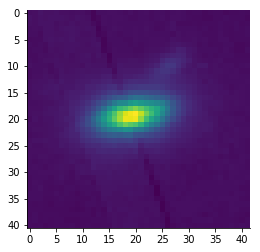

In [19]:
df = read_csv('image1.csv', delimiter=' ')
matrix = df.values
print(df.shape)
center = (matrix.shape[0]/2, matrix.shape[1]/2)
ax = plt.subplot(1, 1, 1)

ax.matshow(matrix)
# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

plt.show()

[7.62932331e-01 7.90143989e+04]
8.756247282093346


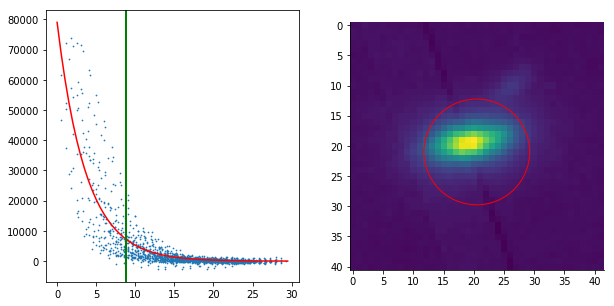

In [24]:
fig, (ax2, ax3) = plt.subplots(1, 2, figsize=(10, 5))
xdata = []
ydata = []

for x in range(matrix.shape[0]):
    for y in range(matrix.shape[1]):
        xdata.append(sqrt(pow(x - center[0], 2) + pow(y - center[1], 2)))
        ydata.append(matrix[x,y])

ax2.scatter(xdata, ydata, s=0.5)

# Now, attempt to fit a curve 
def exponential(x, a, b):
    return b * a**x

from scipy.optimize import curve_fit
popt, pcov = curve_fit(exponential, xdata, ydata)

xs = [x for x in np.arange(0, 30, 0.5)]
ax2.plot(xs, exponential(xs, *popt), 'r', label='fit: a=%5.3f, b=%5.3f' % tuple(popt))

from math import log
print(popt)
# derivative of line of best fit is popt[1] * (popt[0]^x) * ln(popt[0])
radius = (log(-2000/(popt[1] * log(popt[0]))))/(log(popt[0]))
print(radius)

ax2.axvline(radius, linewidth=2, color='g')

ax3.matshow(matrix)
# Hide the right and top spines
ax3.spines['right'].set_visible(False)
ax3.spines['top'].set_visible(False)

# Only show ticks on the left and bottom spines
ax3.yaxis.set_ticks_position('left')
ax3.xaxis.set_ticks_position('bottom')
from matplotlib.patches import Circle
circle = Circle(center, radius, fill=False, edgecolor='r')
ax3.add_patch(circle)

plt.show()

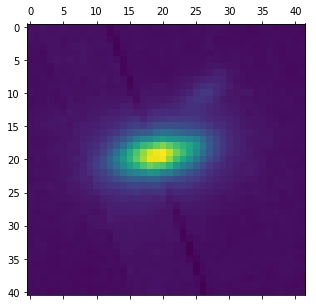

In [25]:
fig, ax4 = plt.subplots(1, 1, figsize=(5, 5))
ax4.matshow(matrix)




plt.show()